# Análisis de ventas de una empresa.

### Carga de Datos

In [1]:
import pandas as pd

#Cargar el DataSet
df = pd.read_csv('Sample-Superstore.csv', encoding='latin1')

#Cambiar el formato de las fechas 
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y', errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], format='%m/%d/%Y', errors='coerce')

#Mostrar las primeras 5 filas para exploración
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [84]:
#Guardar el DataFrame en un archivo CSV 
df.to_csv('ventas_superstore.csv', index=False)

### Revisión de Datos

In [85]:
#Ver las columnas y los tipos de valores
df.info()

#Ver las propiedades del DataFrame
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


Podemos visualizar las distintas columnas del DataFrame para porder realizar el análisis de ventas, teniendo en cuenta la región de ventas, la fecha, la categoría a la que pretenecen los productos, el descuento y el beneficio que tienen, entre otras propiedades, se usará todo esto para hacer un análisis sobre las ventas de la empresa.

### Crear la base de datos en SQLite

In [86]:
import sqlite3

#Conectar con la base de datos. (En caso de que no exista, la creará)
conn = sqlite3.connect('superstore.db')

#Guardar el DataFrame en la base de datos como tabla
df.to_sql('sales', conn, if_exists='replace', index=False)

#Cerrar la conexión
conn.close()

### Análisis exploratorio de Datos

#### Total de ventas por categoría.

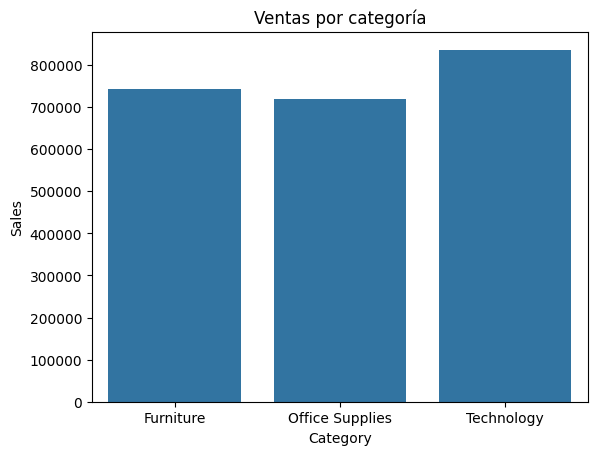

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

#Agrupar las ventas por categoría
sales_by_category = df.groupby('Category')['Sales'].sum().reset_index()

#Visualización
sns.barplot(x='Category', y='Sales', data=sales_by_category)
plt.title('Ventas por categoría')
plt.show()

Entre las 3 categorías principales de productos de la empresa, notamos que están bastante equilibradas en cuestión a ventas totales, siendo la parte de tecnología la que más ventas totales tiene.

#### Total de ventas por región.

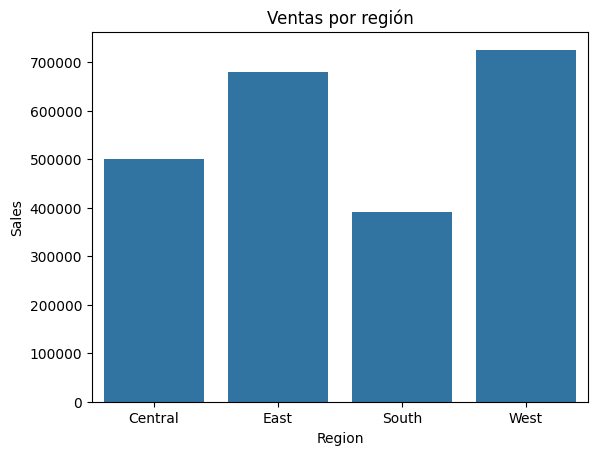

In [88]:
#Agrupar las ventas por región
sales_by_region = df.groupby('Region')['Sales'].sum().reset_index()

#Visualización
sns.barplot(x='Region', y='Sales', data=sales_by_region)
plt.title('Ventas por región')
plt.show()

Entre las cuatro regiones de Estados Unidos (Norte, Sur, Este, Oeste), notamos que hay una clara tendencia en las regiones Este y Oeste para comprar más prodcutos en la tienda. Esto se puede deber a distintos factores, la distribusión de población en las regiones, la distribución geográfica de las tiendas, la competencia de mercado en estas regiones, entre otras.

#### Top 10 productos más vendidos.

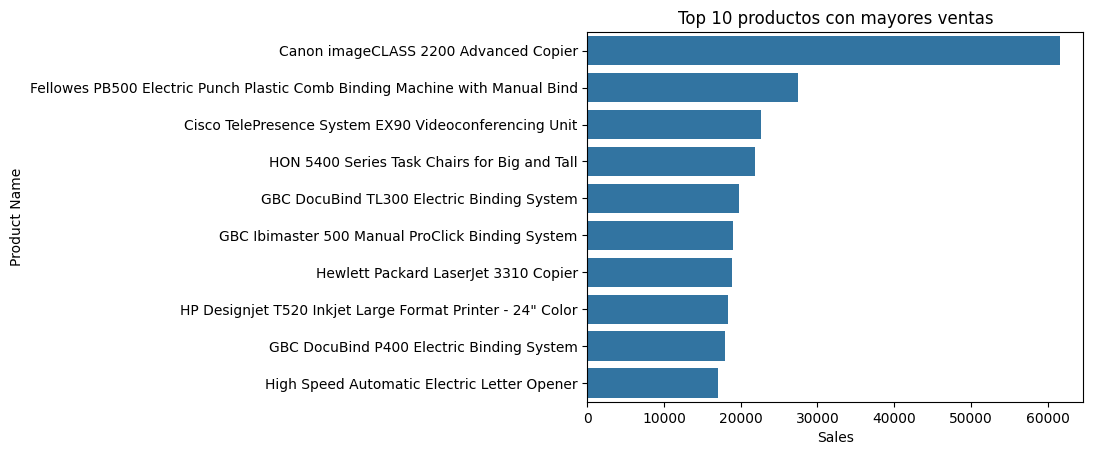

In [89]:
#Mostrar los 10 productos más vendidos
top_products = df.groupby('Product Name')['Sales'].sum().reset_index().sort_values(by='Sales', ascending=False).head(10)

#Visualización
sns.barplot(x='Sales', y='Product Name', data=top_products)
plt.title('Top 10 productos con mayores ventas')
plt.show()


El porducto más vendido es por mucho, más demandado que el resto de productos, lo cual muestra una clara tendencia del público sobre este producto, siendo una oportunidad para publicitar e incentivar el marketing sobre este tipo de productos.

#### Rentabilidad por región.

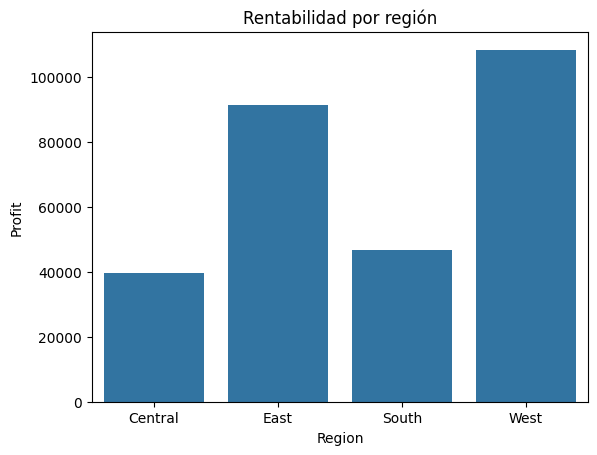

In [90]:
#Rentabilidad por región
profit_by_region = df.groupby('Region')['Profit'].sum().reset_index()

#Visualización
sns.barplot(x='Region', y='Profit', data=profit_by_region)
plt.title('Rentabilidad por región')
plt.show()

Se tiene más rentabilidad en las regiones Este y Oeste, lo cual es lógico, pues estas regiones es donde se vende más.

#### Rentabilidad por categoría.

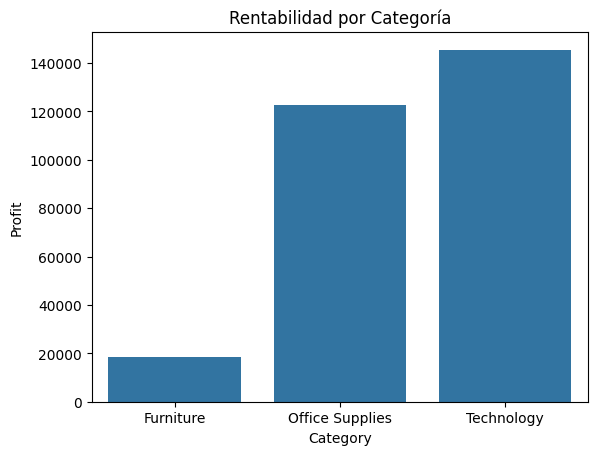

In [91]:
#Rentabilidad por categoría
profit_by_category = df.groupby('Category')['Profit'].sum().reset_index()

sns.barplot(x='Category', y='Profit', data=profit_by_category)
plt.title('Rentabilidad por Categoría')
plt.show()

Se nota una clara tendencia de rentabilidad a artículos de oficina y tecnología comparados con muebles. Esto no necesariamente quiere decir que la venta de muebles sea una mala estrategia, pues los artículos de oficina y tecgnología dada su naturaleza son mucho más demandados ya que, en el caso de artículos de oficina su uso se renueva constantemente y en el caso de tecnología se actualizan constantemente a comparación de los muebles que son más duraderos.

#### Análisis de descuentos.

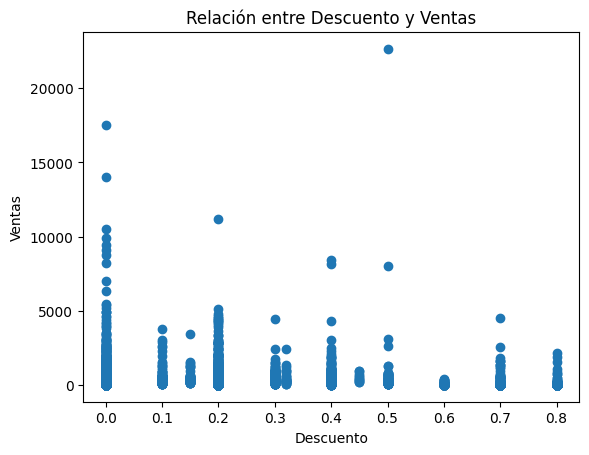

In [92]:
#Análisis de descuentos

#Se peude analizar si los descuentos afectan a las ventas y cómo lo hacen. 
plt.scatter(df['Discount'], df['Sales'])
plt.title('Relación entre Descuento y Ventas')
plt.xlabel('Descuento')
plt.ylabel('Ventas')
plt.show()

No existe una tendencia clara entre la aplicación de descuentos y las ventas de los productos, por lo que no se puede decir que afecten de manera positiva o negativa a las ventas. Igual se tiene que analizar sobre qué productos se realizan descuentos en comparación a su demanda.

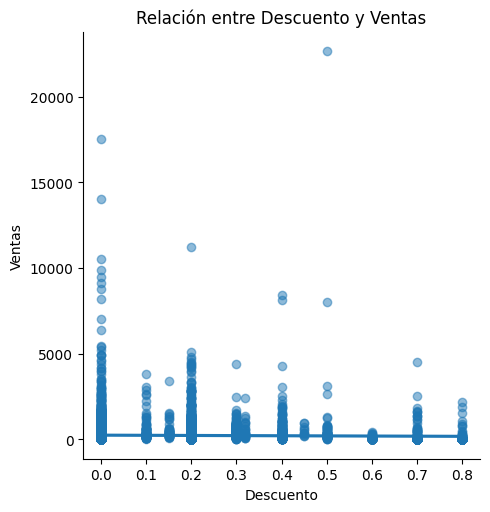

In [93]:
#Creando gráfico de dispersión con línea de regresión, para poder visualizar con más claridad si afectan los descuentos a las ventas

sns.lmplot(x='Discount', y='Sales', data=df, scatter_kws={'alpha':0.5})
plt.title('Relación entre Descuento y Ventas')
plt.xlabel('Descuento')
plt.ylabel('Ventas')
plt.show()

Realizamos una línea de regresión para tratar de encontrar un patrón entre los descuentos y las ventas y encontramos que en efecto no hay una relación clara.

In [94]:
#Calcular coeficiente de correlación 

#Valor cerecano a 1 indica correlación positiva fuerte
#Valor cercano a -1 indica correlación negativa fuerte
#Valor cercano a 0 indica que no hay relación significativa

correlation = df['Discount'].corr(df['Sales'])
print(f'Coeficiente de correlación: {correlation}')


Coeficiente de correlación: -0.02819012415753557


#### Tendencias de las ventas a lo largo del tiempo.

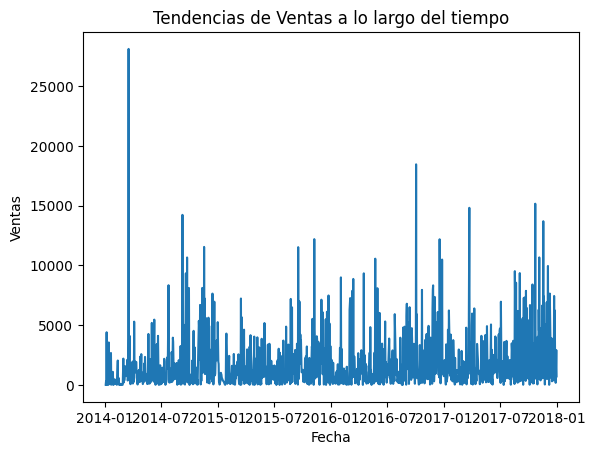

In [95]:
#Tendencias temporales de ventas

df['Order Date'] = pd.to_datetime(df['Order Date'])
sales_by_date = df.groupby('Order Date')['Sales'].sum().reset_index()

#Visualización
plt.plot(sales_by_date['Order Date'], sales_by_date['Sales'])
plt.title('Tendencias de Ventas a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Ventas')
plt.show()

En el año 2014 hubo un auge de ventas, siendo el mejor año para la empresa, de ahí se ha mantenido estable con una leve tendencia a la alta, con varios picos de ventas sobresalientes, estos pueden ser debidos a ciertas épocas del año, donde aumenta la demanda, hay más ofertas o le está yendo bien económicamente al país.

#### Análisis RFM (Recency, Frequency, Monetary)

La segmentación de clientes es una técnica que agrupa a los clientes en función de sus características o comportamientos.

Recencia: Mide cuánto tiempo ha pasado desde la última compra de un cliente. Los clientes que han comprado más recientemente suelen tener más probabilidades de comprar de nuevo. 

Frecuencia: Mide cuántas veces un cliente ha realizado una compra. Los clientes con una mayor frecuencia tienden a ser más leales.

Valor monetario: Mide cuánto dinero ha gastado un cliente en total. Los clientes con un mayor valor monetario son, a menudo, los más valiosos para el negocio.

In [96]:
#Segmentación de clientes

reference_date = df['Order Date'].max()

rfm = df.groupby('Customer ID').agg({
    'Order Date': lambda x: (reference_date - x.max()).days,
    'Sales': ['sum', 'count']
}).reset_index()

rfm.columns = ['Customer ID', 'Recency', 'Monetary', 'Frequency']
#Recency: Días desde la última compra
#Monetary: Suma total de las ventas (dinero gastado por el cliente)
#Frequency: Número de pedidos realizados

rfm.head(10)

,Customer ID,Recency,Monetary,Frequency
0,AA-10315,184,5563.560,11
1,AA-10375,19,1056.390,15
2,AA-10480,259,1790.512,12
3,AA-10645,55,5086.935,18
4,AB-10015,415,886.156,6
5,AB-10060,54,7755.620,18
6,AB-10105,41,14473.571,20
7,AB-10150,41,966.710,12
8,AB-10165,25,1113.838,14
9,AB-10255,166,914.532,14


Se pueden hacer varias cosas después de realizar el análisis RFM

1. Segmentar clientes:

Crear categorías basadas en los valores de recencia, frecuencia y valor monetario (por ejemplo, clientes frecuentes, clientes de alto valor, clientes que no han comprado en mucho tiempo, etc.).

2. Estrategias personalizadas:

Enviar promociones a clientes que no han comprado en mucho tiempo (recencia alta).

Crear programas de lealtad para clientes con alta frecuencia.

Identificar los clientes de mayor valor y hacer campañas para aumentar su lealtad.


#### Correlación entre variables (ventas, cantidad de productos, descuentos y rentabilidad)

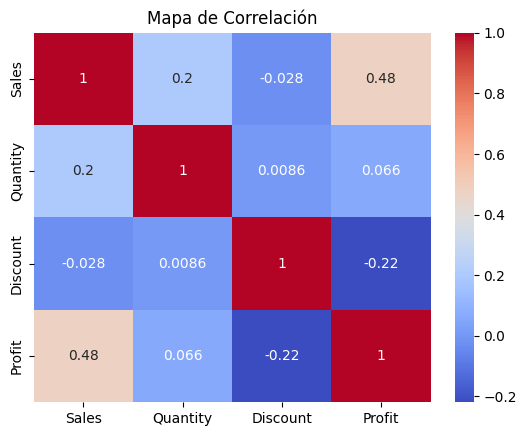

In [97]:
#Correlación entre variables

correlation = df[['Sales', 'Quantity', 'Discount', 'Profit']].corr()

#Visualización del mapa de calor de la correlación
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlación')
plt.show()

#### Sentencias que se pueden ejecutar usando SQL

In [98]:
--Visualizar las primeras filas de la tabla (equivalente a df.head())
SELECT * FROM sales LIMIT 10;

--Contar el número de registros 
SELECT COUNT(*) FROM sales;

--Total de ventas
SELECT SUM(Sales) AS TotalSales FROM sales;

--Ventas por categoría
SELECT Category, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Category;

--Ventas superiores a 1000
SELECT * 
FROM sales
WHERE Sales > 1000;

--Promedio de ventas por región
SELECT Region, AVG(Sales) AS AverageSales
FROM sales
GROUP BY Region;

--Top 10 productos más vendidos
SELECT ProductName, SUM(Sales) AS TotalSales
FROM sales
GROUP BY ProductName
ORDER BY TotalSales DESC
LIMIT 10;

--Número de clientes únicos
SELECT COUNT(DISTINCT CustomerID) AS UniqueCustomers
FROM sales;

--Ventas anuales
SELECT strftime('%Y', OrderDate) AS Year, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Year;

--Ventas mensuales
SELECT strftime('%Y-%m', OrderDate) AS Month, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Month;

--Frecuencia de compras por cliente
SELECT CustomerID, COUNT(OrderID) AS OrderCount
FROM sales
GROUP BY CustomerID
ORDER BY OrderCount DESC;

--Ventas por región y segmento
SELECT Region, Segment, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Region, Segment
ORDER BY TotalSales DESC;

--Productos con más descuentos
SELECT ProductName, SUM(Discount) AS TotalDiscount
FROM sales
GROUP BY ProductName
ORDER BY TotalDiscount DESC
LIMIT 10;

--Clientes con mayores compras totales
SELECT CustomerID, CustomerName, SUM(Sales) AS TotalSpent
FROM sales
GROUP BY CustomerID
ORDER BY TotalSpent DESC
LIMIT 10;

--Clientes frecuentes pero con bajas compras
SELECT CustomerID, CustomerName, COUNT(OrderID) AS OrderCount ,SUM(Sales) AS TotalSpent
FROM sales
GROUP BY CustomerID
HAVING TotalSpent < 500
ORDER BY OrderCount DESC;

--Relación entre descuentos y ventas
SELECT Category, SUM(Discount) AS TotalDiscount, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Category;

--Análisis de ganancia por producto o categoría
SELECT Category, ProductName, SUM(Sales - Profit) AS TotalCost, SUM(Profit) AS TotalProfit
FROM sales
GROUP BY Category, ProductName;

--Correlación entre descuentos y ventas
SELECT Discount, AVG(Sales) AS AverageSales
FROM sales
GROUP BY Discount;

--Ciclo de vida del cliente
SELECT CustomerID, COUNT(OrderID) AS TotalOrders, SUM(Sales) AS TotalSales
FROM sales
GROUP BY CustomerID
ORDER BY TotalOrders DESC;

--Distribución geográfica de las ventas
SELECT Region, City, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Region, City;

--Ventas cruzadas (productos más comprados juntos)
SELECT OrderID, GROUP_CONCAT(ProductName) AS ProductsBought
FROM sales
GROUP BY OrderID;


SyntaxError: invalid syntax (2634011221.py, line 1)

#### Ejecutando las sentencias de SQL


In [99]:
#Visualizar las primeras 10 filas de la tabla
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT * FROM sales LIMIT 10;
'''
df = pd.read_sql_query(query, conn)
conn.close()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08 00:00:00,2016-11-11 00:00:00,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12 00:00:00,2016-06-16 00:00:00,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11 00:00:00,2015-10-18 00:00:00,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,2014-06-09 00:00:00,2014-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,2014-06-09 00:00:00,2014-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,2014-06-09 00:00:00,2014-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,2014-06-09 00:00:00,2014-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,2014-06-09 00:00:00,2014-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [100]:
#Contar el número de registros
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT COUNT(*) FROM sales;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,COUNT(*)
0,9994


In [101]:
#Total de Ventas
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT SUM(Sales) AS TotalSales FROM sales;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,TotalSales
0,2.297201e+06


In [102]:
#Ventas por categoría
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT Category, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Category;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Category,TotalSales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


In [103]:
#Ventas superiores a 1000
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT * 
FROM sales
WHERE Sales > 1000;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,11,CA-2014-115812,2014-06-09 00:00:00,2014-06-14 00:00:00,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.184,9,0.2,85.3092
1,25,CA-2015-106320,2015-09-25 00:00:00,2015-09-30 00:00:00,Standard Class,EB-13870,Emily Burns,Consumer,United States,Orem,...,84057,West,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,1044.630,3,0.0,240.2649
2,28,US-2015-150630,2015-09-17 00:00:00,2015-09-21 00:00:00,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,19140,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.430,7,0.5,-1665.0522
3,36,CA-2016-117590,2016-12-08 00:00:00,2016-12-10 00:00:00,First Class,GH-14485,Gene Hale,Corporate,United States,Richardson,...,75080,Central,TEC-PH-10004977,Technology,Phones,GE 30524EE4,1097.544,7,0.2,123.4737
4,55,CA-2016-105816,2016-12-11 00:00:00,2016-12-17 00:00:00,Standard Class,JM-15265,Janet Molinari,Corporate,United States,New York City,...,10024,East,TEC-PH-10002447,Technology,Phones,AT&T CL83451 4-Handset Telephone,1029.950,5,0.0,298.6855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
463,9867,US-2015-116981,2015-03-26 00:00:00,2015-03-28 00:00:00,Second Class,SM-20950,Suzanne McNair,Corporate,United States,New York City,...,10009,East,OFF-ST-10002615,Office Supplies,Storage,"Dual Level, Single-Width Filing Carts",1085.420,7,0.0,282.2092
464,9926,CA-2015-159534,2015-03-20 00:00:00,2015-03-23 00:00:00,First Class,DH-13075,Dave Hallsten,Corporate,United States,New York City,...,10035,East,OFF-BI-10003656,Office Supplies,Binders,Fellowes PB200 Plastic Comb Binding Machine,1087.936,8,0.2,353.5792
465,9930,CA-2016-129630,2016-09-04 00:00:00,2016-09-04 00:00:00,Same Day,IM-15055,Ionia McGrath,Consumer,United States,San Francisco,...,94122,West,TEC-CO-10003763,Technology,Copiers,Canon PC1060 Personal Laser Copier,2799.960,5,0.2,944.9865
466,9948,CA-2017-121559,2017-06-01 00:00:00,2017-06-03 00:00:00,Second Class,HW-14935,Helen Wasserman,Corporate,United States,Indianapolis,...,46203,Central,FUR-CH-10003746,Furniture,Chairs,Hon 4070 Series Pagoda Round Back Stacking Chairs,1925.880,6,0.0,539.2464


In [104]:
#Promedio de ventas por región
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT Region, AVG(Sales) AS AverageSales
FROM sales
GROUP BY Region;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Region,AverageSales
0,Central,215.772661
1,East,238.336110
2,South,241.803645
3,West,226.493233


In [105]:
#Top 10 productos más vendidos
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT "Product Name", SUM(Sales) AS TotalSales
FROM sales
GROUP BY "Product Name"
ORDER BY TotalSales DESC
LIMIT 10;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Product Name,TotalSales
0,Canon imageCLASS 2200 Advanced Copier,61599.824
1,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
2,Cisco TelePresence System EX90 Videoconferenci...,22638.480
3,HON 5400 Series Task Chairs for Big and Tall,21870.576
4,GBC DocuBind TL300 Electric Binding System,19823.479
5,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
6,Hewlett Packard LaserJet 3310 Copier,18839.686
7,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
8,GBC DocuBind P400 Electric Binding System,17965.068
9,High Speed Automatic Electric Letter Opener,17030.312


In [106]:
#Número de clientes únicos
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT COUNT(DISTINCT "Customer ID") AS UniqueCustomers
FROM sales;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,UniqueCustomers
0,793


In [107]:
#Vetnas anuales
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT strftime('%Y', "Order Date") AS Year, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Year;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Year,TotalSales
0,2014,484247.4981
1,2015,470532.5090
2,2016,609205.5980
3,2017,733215.2552


In [108]:
#Ventas mensuales
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT strftime('%Y-%m', "Order Date") AS Month, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Month;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Month,TotalSales
0,2014-01,14236.8950
1,2014-02,4519.8920
2,2014-03,55691.0090
3,2014-04,28295.3450
4,2014-05,23648.2870
5,2014-06,34595.1276
6,2014-07,33946.3930
7,2014-08,27909.4685
8,2014-09,81777.3508
9,2014-10,31453.3930


In [109]:
#Frecuancia de compras por cliente
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT "Customer ID", COUNT("Order ID") AS OrderCount
FROM sales
GROUP BY "Customer ID"
ORDER BY OrderCount DESC;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Customer ID,OrderCount
0,WB-21850,37
1,PP-18955,34
2,MA-17560,34
3,JL-15835,34
4,SV-20365,32
...,...,...
788,RE-19405,1
789,LD-16855,1
790,JR-15700,1
791,CJ-11875,1


In [110]:
#Ventas por región y segmento
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT Region, Segment, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Region, Segment
ORDER BY TotalSales DESC;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Region,Segment,TotalSales
0,West,Consumer,362880.7730
1,East,Consumer,350908.1670
2,Central,Consumer,252031.4340
3,West,Corporate,225855.2745
4,East,Corporate,200409.3470
5,South,Consumer,195580.9710
6,Central,Corporate,157995.8128
7,West,Home Office,136721.7770
8,East,Home Office,127463.7260
9,South,Corporate,121885.9325


In [111]:
#Top 10 productos con más descuentos
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT "Product Name", SUM(Discount) AS TotalDiscount
FROM sales
GROUP BY "Product Name"
ORDER BY TotalDiscount DESC
LIMIT 10;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Product Name,TotalDiscount
0,Storex Dura Pro Binders,7.2
1,Avery Non-Stick Binders,6.8
2,GBC Instant Report Kit,6.4
3,"GBC Standard Recycled Report Covers, Clear Pla...",5.9
4,Avery Self-Adhesive Photo Pockets for Polaroid...,5.9
5,"Premier Elliptical Ring Binder, Black",5.8
6,GBC Standard Therm-A-Bind Covers,5.8
7,GBC Premium Transparent Covers with Diagonal L...,5.6
8,Acco D-Ring Binder w/DublLock,5.6
9,"Pressboard Covers with Storage Hooks, 9 1/2"" x...",5.4


In [112]:
#Clientes con mayores compras totales
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT "Customer ID", "Customer Name", SUM(Sales) AS TotalSpent
FROM sales
GROUP BY "Customer ID"
ORDER BY TotalSpent DESC
LIMIT 10;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Customer ID,Customer Name,TotalSpent
0,SM-20320,Sean Miller,25043.050
1,TC-20980,Tamara Chand,19052.218
2,RB-19360,Raymond Buch,15117.339
3,TA-21385,Tom Ashbrook,14595.620
4,AB-10105,Adrian Barton,14473.571
5,KL-16645,Ken Lonsdale,14175.229
6,SC-20095,Sanjit Chand,14142.334
7,HL-15040,Hunter Lopez,12873.298
8,SE-20110,Sanjit Engle,12209.438
9,CC-12370,Christopher Conant,12129.072


In [113]:
#Clientes frecuentes pero con bajas compras
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT "Customer ID", "Customer Name", COUNT("Order ID") AS OrderCount ,SUM(Sales) AS TotalSpent
FROM sales
GROUP BY "Customer ID"
HAVING TotalSpent < 500
ORDER BY OrderCount DESC;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Customer ID,Customer Name,OrderCount,TotalSpent
0,ST-20530,Shui Tom,12,433.340
1,JD-16015,Joy Daniels,11,385.430
2,AY-10555,Andy Yotov,10,497.014
3,SS-20590,Sonia Sunley,9,418.490
4,MH-17440,Mark Haberlin,9,400.016
...,...,...,...,...
68,AR-10570,Anemone Ratner,2,88.150
69,RE-19405,Ricardo Emerson,1,48.360
70,LD-16855,Lela Donovan,1,5.304
71,CJ-11875,Carl Jackson,1,16.520


In [114]:
#Relación entre descuentos y ventas
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT Category, SUM(Discount) AS TotalDiscount, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Category;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Category,TotalDiscount,TotalSales
0,Furniture,368.89,741999.7953
1,Office Supplies,947.80,719047.0320
2,Technology,244.40,836154.0330


In [115]:
#Análisis de ganancia por producto o categoría
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT Category, "Product Name", SUM(Sales - Profit) AS TotalCost, SUM(Profit) AS TotalProfit
FROM sales
GROUP BY Category, "Product Name";
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Category,Product Name,TotalCost,TotalProfit
0,Furniture,12-1/2 Diameter Round Wall Clock,460.3392,91.1088
1,Furniture,24-Hour Round Wall Clock,307.4922,180.0198
2,Furniture,36X48 HARDFLOOR CHAIRMAT,409.7394,-40.4914
3,Furniture,3M Hangers With Command Adhesive,72.0390,36.0010
4,Furniture,3M Polarizing Light Filter Sleeves,140.9940,75.3460
...,...,...,...,...
1845,Technology,iKross Bluetooth Portable Keyboard + Cell Phon...,362.0160,115.6440
1846,Technology,iOttie HLCRIO102 Car Mount,227.8860,-11.9940
1847,Technology,iOttie XL Car Mount,274.2628,-50.3748
1848,Technology,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,271.2892,171.2648


In [116]:
#Correlación entre descuentos y ventas
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT Discount, AVG(Sales) AS AverageSales
FROM sales
GROUP BY Discount;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Discount,AverageSales
0,0.00,226.742074
1,0.10,578.397351
2,0.15,529.971567
3,0.20,209.076940
4,0.30,454.742974
5,0.32,536.794770
6,0.40,565.134874
7,0.45,498.634000
8,0.50,892.705152
9,0.60,48.150000


In [117]:
#Ciclo de vidad del cliente
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT "Customer ID", COUNT("Order ID") AS TotalOrders, SUM(Sales) AS TotalSales
FROM sales
GROUP BY "Customer ID"
ORDER BY TotalOrders DESC;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Customer ID,TotalOrders,TotalSales
0,WB-21850,37,6160.102
1,PP-18955,34,7252.608
2,MA-17560,34,4299.161
3,JL-15835,34,9799.923
4,SV-20365,32,11470.950
...,...,...,...
788,RE-19405,1,48.360
789,LD-16855,1,5.304
790,JR-15700,1,863.880
791,CJ-11875,1,16.520


In [118]:
#Distribución geográfica de las ventas
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT Region, City, SUM(Sales) AS TotalSales
FROM sales
GROUP BY Region, City;
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Region,City,TotalSales
0,Central,Aberdeen,25.5000
1,Central,Abilene,1.3920
2,Central,Allen,290.2060
3,Central,Amarillo,3773.0628
4,Central,Ann Arbor,889.2730
...,...,...,...
578,West,Westminster,3826.6460
579,West,Whittier,444.7680
580,West,Woodland,264.6620
581,West,Yucaipa,50.8000


In [119]:
#Ventas cruzadas
conn = sqlite3.connect('superstore.db')
cursor = conn.cursor()
query = '''
SELECT "Order ID", GROUP_CONCAT("Product Name") AS ProductsBought
FROM sales
GROUP BY "Order ID";
''' 
df = pd.read_sql_query(query, conn)
conn.close()
df

,Order ID,ProductsBought
0,CA-2014-100006,AT&T EL51110 DECT
1,CA-2014-100090,"Hon 2111 Invitation Series Corner Table,Wilson..."
2,CA-2014-100293,Xerox 1887
3,CA-2014-100328,"Pressboard Covers with Storage Hooks, 9 1/2"" x..."
4,CA-2014-100363,"Binder Clips by OIC,Things To Do Today Spiral ..."
...,...,...
5004,US-2017-168802,Binder Posts
5005,US-2017-169320,"Quartet Omega Colored Chalk, 12/Pack,Memorex 2..."
5006,US-2017-169488,"Avoid Verbal Orders Carbonless Minifold Book,X..."
5007,US-2017-169502,"Acme Stainless Steel Office Snips,Acco 6 Outle..."
